Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


C:\Users\ranji\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\ranji\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.5115 - loss: 0.7936 - val_accuracy: 0.5200 - val_loss: 0.6876
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.5459 - loss: 0.6919 - val_accuracy: 0.5370 - val_loss: 0.6953
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 903ms/step - accuracy: 0.5692 - loss: 0.6776 - val_accuracy: 0.6440 - val_loss: 0.6248
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 502ms/step - accuracy: 0.6335 - loss: 0.6293 - val_accuracy: 0.6500 - val_loss: 0.6142
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 501ms/step - accuracy: 0.6685 - loss: 0.6203 - val_accuracy: 0.6430 - val_loss: 0.6119
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 589ms/step - accuracy: 0.6565 - loss: 0.6185 - val_accuracy: 0.6540 - val_loss: 0.5954
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 509ms/step - accuracy: 0.6654 - loss: 0.5998 - val_accuracy: 0.7040 - val_loss: 0.5600
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 508ms/step - accuracy: 0.6994 - loss: 0.5768 - val_accuracy: 0.6490 - v

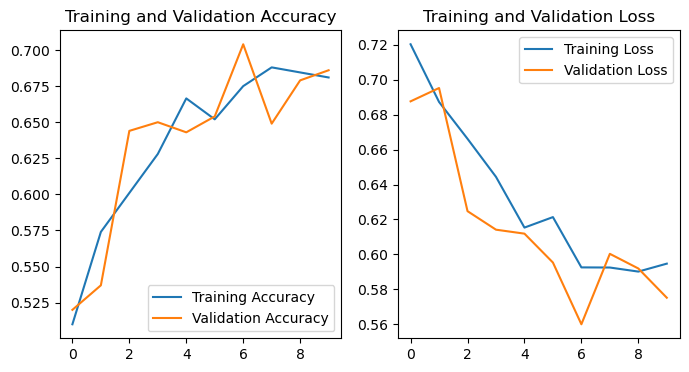

Model training completed and saved!


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

# Define dataset paths
train_dir = r"C:\Users\ranji\OneDrive\Desktop\cats_and_dogs_filtered\train"
val_dir = r"C:\Users\ranji\OneDrive\Desktop\cats_and_dogs_filtered\validation"

# Image preprocessing
IMG_HEIGHT, IMG_WIDTH = 150, 150
BATCH_SIZE = 32

train_image_generator = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                           height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                           horizontal_flip=True, fill_mode='nearest')

val_image_generator = ImageDataGenerator(rescale=1./255)

test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE, class_mode='binary')

val_data_gen = val_image_generator.flow_from_directory(
    val_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE, class_mode='binary')

# Build CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
EPOCHS = 10
history = model.fit(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

# Plot training history
def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_metrics(history)

# Save the model
model.save("cat_dog_classifier.h5")

print("Model training completed and saved!")
